In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import ReexploreLevel
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.cost_estimators.factored_collision_free_ce import FactoredCollisionFreeCE

import numpy as np
from copy import deepcopy
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
# logging.getLogger().setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)

In [12]:
# cg = ContactGraph.load_from_file(params.graph_file_path)
cg = ContactGraph.load_from_file(
    ContactGraphGeneratorParams.graph_file_path_from_name("cg_trichal2")
    )

INFO:large_gcs.graph.contact_graph:Loading 20 contact pair modes for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating force constraints for 179 sets...


100%|██████████| 179/179 [00:00<00:00, 2284.12it/s]
INFO:large_gcs.graph.contact_graph:Generating contact sets for 179 sets...
100%|██████████| 179/179 [00:03<00:00, 50.89it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 181/181 [00:00<00:00, 8980.74it/s]
INFO:large_gcs.graph.graph:Adding 181 vertices to graph...
100%|██████████| 181/181 [00:00<00:00, 10795.00it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 6408/6408 [00:00<00:00, 8941.85it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 6408/6408 [00:01<00:00, 4779.26it/s]
INFO:large_gcs.graph.graph:Adding 6408 edges to graph...
100%|██████████| 6408/6408 [00:01<00:00, 3994.78it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_vertices=181, n_edges=6408, source=[array([3.250, 0.000]), array([1.500, 0.500])], target=[array([-1.500, 0.000]), array([-3,  0])], workspace=array([[-5,  5],
      

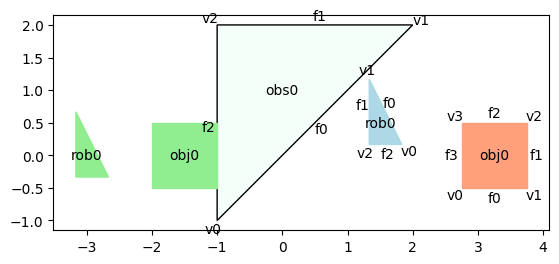

In [13]:
cg.plot()

In [14]:
cg.incoming_edges("target")

[Edge(u="('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')", v='target', costs=[<pydrake.solvers.LinearCost object at 0x17d429ef0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x17d509130>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x17d660bf0>),
 Edge(u="('NC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')", v='target', costs=[<pydrake.solvers.LinearCost object at 0x17d4c03b0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x17d59a430>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x17d76ef30>)]

In [15]:
cg.outgoing_edges("source")

[Edge(u='source', v="('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", costs=[<pydrake.solvers.LinearCost object at 0x17d4c2db0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x17d5b6a30>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x17d7a0230>)]

In [6]:
# sol = cg.solve_shortest_path(use_convex_relaxation=False)
# print(sol)

In [7]:
# cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=False, obj_multiplier=100)

# gcs_astar = GcsAstarConvexRestriction(
#     cg,
#     cost_estimator=cost_estimator,
#     reexplore_level=ReexploreLevel.PARTIAL,
# )
# sol = gcs_astar.run()

In [8]:
# anim = cg.animate_solution()
# HTML(anim.to_html5_video())

In [19]:
cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
# cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=True, obj_multiplier=100)

gcs_astar = GcsAstarConvexRestriction(
    cg,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()

INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Running GcsAstarConvexRestriction, reexplore_level: ReexploreLevel.NONE
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:visited_fd_vertices: {'source', 'target'}
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.011, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node source's 1 neighbors (0)
DEBUG:large_gcs.algorithms.gcs_astar_convex_restriction:edge source -> ('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0') is feasible, new dist: 238.26001651229802, added to pq True
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:visited_fd_vertices: {"('NC|obs0_f0-obj0_v3', 'NC|obs0_

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpxgqq86vh/temp.m4v


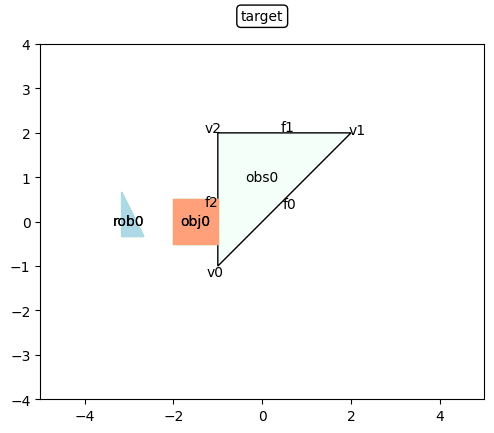

In [20]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())

In [11]:
# anim = cg.animate_solution()
# HTML(anim.to_html5_video())